<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/Analyzing_IPL_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading the IPL matches dataset
IPL = pd.read_csv("matches.csv")

In [4]:
# having a glance at the first five records of the dataset
IPL.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# Looking at the number of rows and columns in the dataset
IPL.shape

(636, 18)

In [6]:
# Getting the frequency of most man of the match awards
IPL['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
S Nadeem           1
KV Sharma          1
MN Samuels         1
Q de Kock          1
MF Maharoof        1
Name: player_of_match, Length: 201, dtype: int64

In [7]:
# Getting the top 10 players with most man of the match awards
IPL['player_of_match'].value_counts()[0:10]

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

In [9]:
# Getting the top 5 players with most man of the match awards
IPL['player_of_match'].value_counts()[0:5]

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
Name: player_of_match, dtype: int64

In [10]:
list(IPL['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'YK Pathan', 'DA Warner', 'AB de Villiers', 'SK Raina']

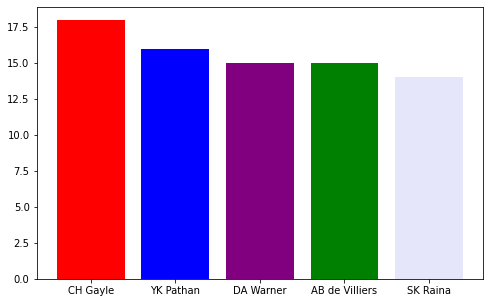

In [18]:
# Making a bar plot for the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(IPL['player_of_match'].value_counts()[0:5].keys()), list(IPL['player_of_match'].value_counts()[0:5]), color=['red', 'blue', 'purple', 'green', 'lavender'])
plt.show()

In [19]:
# Getting the frequency of result column
IPL['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [20]:
# Finding out the number of toss wins w.r.t each team
IPL['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [22]:
# Extracting the records where a team won batting first
batting_first = IPL[IPL['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


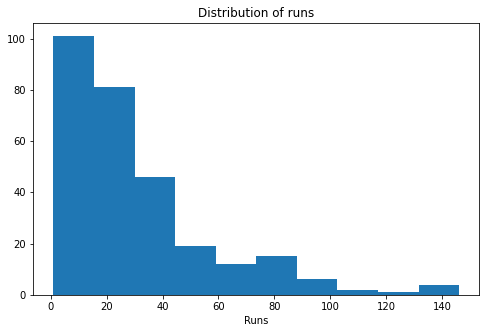

In [23]:
# Making a Histogram
plt.figure(figsize=(8,5))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of runs")
plt.xlabel("Runs")
plt.show()

In [24]:
# Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Rajasthan Royals               23
Sunrisers Hyderabad            23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

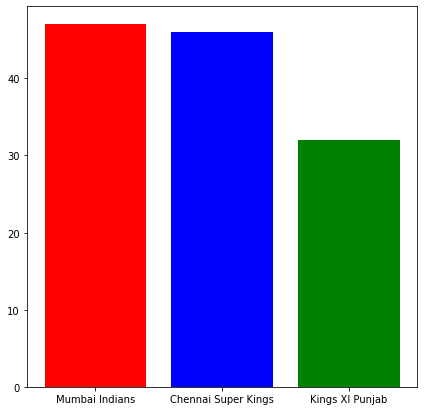

In [25]:
# Making a bar plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()), list(batting_first['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.show()

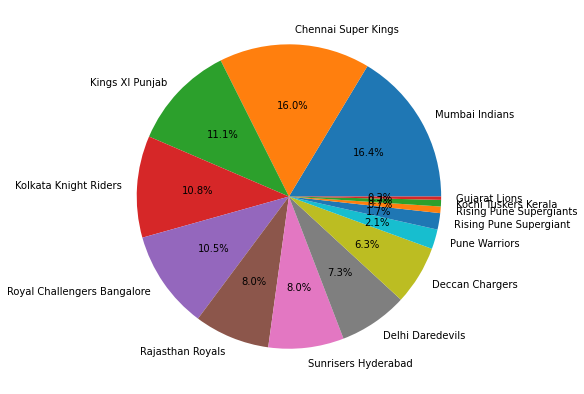

In [26]:
# Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [27]:
# Extracting those records where a team has won after batting second
batting_second = IPL[IPL['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


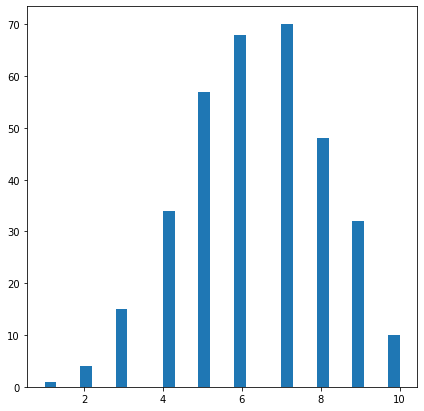

In [28]:
# Making a Histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'], bins=30)
plt.show()

In [29]:
# Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

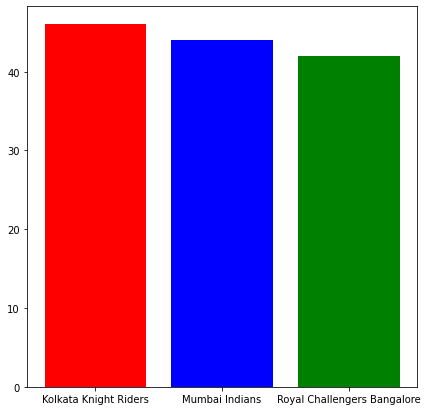

In [30]:
# Making a bar plot for top 3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()), list(batting_second['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.show()

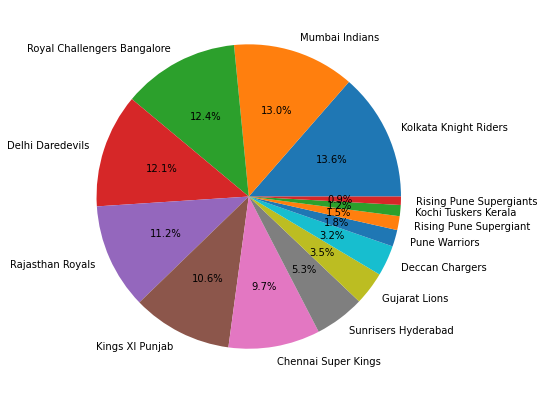

In [31]:
# Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [32]:
# Looking at the number of matches played each season
IPL['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [33]:
# Looking at the number of matches played in each city
IPL['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Abu Dhabi          7
Cuttack            7
Cape Town          7
Ranchi             7
Sharjah            6
Raipur             6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

In [34]:
# Finding out how many times a team has won the match after winning the toss 
np.sum(IPL['toss_winner']==IPL['winner'])

325

In [35]:
325/636

0.5110062893081762